# Decision Tree Regression

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

# Step 1: 

In [2]:
import pandas as pd
df=pd.read_csv('50_Startups.csv')
df.head()

,RND,ADMIN,MKT,STATE,PROFIT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


Perform Quality CHeck

In [3]:
df.isna().sum()

RND       0
ADMIN     0
MKT       0
STATE     0
PROFIT    0
dtype: int64

In [5]:
df.duplicated().sum()

np.int64(0)

# Seperate X  &  Y

In [8]:
X=df.drop(columns=["PROFIT"])
Y=df[["PROFIT"]]

In [9]:
X.head()

,RND,ADMIN,MKT,STATE
0,165349.20,136897.80,471784.10,New York
1,162597.70,151377.59,443898.53,California
2,153441.51,101145.55,407934.54,Florida
3,144372.41,118671.85,383199.62,New York
4,142107.34,91391.77,366168.42,Florida


In [10]:
Y.head()

,PROFIT
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


In [12]:
X.dtypes

RND      float64
ADMIN    float64
MKT      float64
STATE     object
dtype: object

In [13]:
cat=list(X.columns[X.dtypes=='object'])
con=list(X.columns[X.dtypes!='object'])

In [14]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import  StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer

In [19]:
num_pipe = make_pipeline(
    SimpleImputer(strategy="mean"),
     StandardScaler()
)

In [28]:
cat_pipe = make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    OneHotEncoder(handle_unknown="ignore", sparse_output=False)
)

In [29]:
pre=ColumnTransformer([('num', num_pipe, con),
                         ('cat', cat_pipe, cat)]).set_output(transform='pandas')

In [30]:
X_pre = pre.fit_transform(X)
X_pre.head()

,num__RND,num__ADMIN,num__MKT,cat__STATE_California,cat__STATE_Florida,cat__STATE_New York
0,2.016411,0.560753,2.153943,0.0,0.0,1.0
1,1.955860,1.082807,1.923600,1.0,0.0,0.0
2,1.754364,-0.728257,1.626528,0.0,1.0,0.0
3,1.554784,-0.096365,1.422210,0.0,0.0,1.0
4,1.504937,-1.079919,1.281528,0.0,1.0,0.0


In [32]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(
    X_pre,
    Y,
    test_size=0.2,
    random_state=21
)

In [33]:
xtrain.head()

,num__RND,num__ADMIN,num__MKT,cat__STATE_California,cat__STATE_Florida,cat__STATE_New York
30,-0.258074,-0.205629,-0.990357,0.0,1.0,0.0
21,0.102724,1.169186,0.732788,0.0,0.0,1.0
19,0.279442,1.159837,-1.743127,0.0,0.0,1.0
11,0.593085,-1.065540,0.319834,1.0,0.0,0.0
22,0.006007,0.051850,0.762376,0.0,1.0,0.0


In [35]:
xtrain.shape

(40, 6)

In [36]:
xtest.shape

(10, 6)

In [39]:
from sklearn.tree import DecisionTreeRegressor
model1= DecisionTreeRegressor(
max_depth=3,
min_samples_split=5,
min_samples_leaf=5,
criterion="absolute_error"
)
model1.fit(xtrain,ytrain)

DecisionTreeRegressor(criterion='absolute_error', max_depth=3,
                      min_samples_leaf=5, min_samples_split=5)

In [40]:
model1.score(xtrain,ytrain)

0.9170132779190516

In [41]:
model1.score(xtest,ytest)

0.9142766438713301

## Hyper Parameter using  GridSearch Cv

In [43]:
params = {
    "max_depth" :[2,3,4,5,6,7,8,9,10,11],
    "min_samples_split" : [5,6,7,8,9,10],
    "min_samples_leaf" : [5,6,7,8,9,10],
    "criterion" : ["Squared_error","absolute_error"]
}

In [44]:
from sklearn.model_selection import GridSearchCV
dtr = DecisionTreeRegressor()
gscv = GridSearchCV(dtr, param_grid=params, cv=3, scoring='r2')
gscv.fit(xtrain, ytrain)

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['Squared_error', 'absolute_error'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
                         'min_samples_leaf': [5, 6, 7, 8, 9, 10],
                         'min_samples_split': [5, 6, 7, 8, 9, 10]},
             scoring='r2')

In [46]:
gscv.best_score_

np.float64(0.7200499981888969)

In [47]:
gscv.best_params_

{'criterion': 'absolute_error',
 'max_depth': 4,
 'min_samples_leaf': 5,
 'min_samples_split': 5}

In [48]:
best_dtr = gscv.best_estimator_
best_dtr

DecisionTreeRegressor(criterion='absolute_error', max_depth=4,
                      min_samples_leaf=5, min_samples_split=5)

# Model Evaluation

In [49]:
best_dtr.score(xtrain,ytrain)

0.9194209542324717

In [50]:
best_dtr.score(xtest,ytest)

0.9202015467471865

In [51]:
ypred_train = best_dtr.predict(xtrain)
ypred_test = best_dtr.predict(xtest)

In [52]:
ypred_train[0:5]

array([ 96778.92 , 120625.445, 120625.445, 145190.675, 105008.31 ])

In [53]:
ytrain.head()

,PROFIT
30,99937.59
21,111313.02
19,122776.86
11,144259.40
22,110352.25


In [54]:
ypred_test[0:5]

array([145190.675,  79622.835,  49490.75 , 105008.31 , 145190.675])

In [55]:
ytest.head()

,PROFIT
7,155752.60
44,65200.33
43,69758.98
25,107404.34
14,132602.65


In [56]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, \
                            mean_absolute_percentage_error, r2_score

In [57]:
def evaluate_model(model, x, y):
    ypred = model.predict(x)
    mse = mean_squared_error(y, ypred)
    rmse = mse**(1/2)
    mae = mean_absolute_error(y, ypred)
    mape = mean_absolute_percentage_error(y, ypred)
    r2 = r2_score(y, ypred)
    # Print above results
    print(f'Mean Squared Error : {mse:.2f}')
    print(f'Root mean squared error : {rmse:.2f}')
    print(f'Mean Absolute Error : {mae:.2f}')
    print(f'Mean Absolute Percentage Error : {mape:.4f}')
    print(f'R2 Score : {r2:.4f}')

In [58]:
evaluate_model(best_dtr, xtrain, ytrain)

Mean Squared Error : 124462574.61
Root mean squared error : 11156.28
Mean Absolute Error : 7415.43
Mean Absolute Percentage Error : 0.1251
R2 Score : 0.9194


In [59]:
evaluate_model(best_dtr, xtest, ytest)

Mean Squared Error : 141622055.08
Root mean squared error : 11900.51
Mean Absolute Error : 9956.68
Mean Absolute Percentage Error : 0.1102
R2 Score : 0.9202


In [60]:
## Out of sample predictions

In [61]:
xnew = pd.read_csv("Startups_sample.csv")
xnew

,RND,ADMIN,MKT,STATE
0,76253.86,113867.30,298664.47,California
1,100671.96,91790.61,249744.55,California
2,114523.61,122616.84,261776.23,New York
3,153441.51,101145.55,407934.54,NaN
4,144372.41,NaN,383199.62,New York
5,119943.24,156547.42,NaN,Florida
6,75328.87,144135.98,134050.07,Florida
7,86419.70,153514.11,0.00,NaN
8,73994.56,NaN,303319.26,Florida
9,NaN,96189.63,148001.11,California


In [62]:
pre

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['RND', 'ADMIN', 'MKT']),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['STATE'])])

In [63]:
xnew_pre = pre.transform(xnew)
xnew_pre

,num__RND,num__ADMIN,num__MKT,cat__STATE_California,cat__STATE_Florida,cat__STATE_New York
0,0.055726,-0.269588,0.723926,1.0,0.0,0.0
1,0.593085,-1.065540,0.319834,1.0,0.0,0.0
2,0.897913,0.045868,0.419219,0.0,0.0,1.0
3,1.754364,-0.728257,1.626528,1.0,0.0,0.0
4,1.554784,0.000000,1.422210,0.0,0.0,1.0
5,1.017181,1.269199,0.000000,0.0,1.0,0.0
6,0.035370,0.821718,-0.635835,0.0,1.0,0.0
7,0.279442,1.159837,-1.743127,1.0,0.0,0.0
8,0.006007,0.000000,0.762376,0.0,1.0,0.0
9,0.000000,-0.906938,-0.520596,1.0,0.0,0.0


In [64]:
preds=best_dtr.predict(xnew_pre)
preds

array([120625.445, 145190.675, 145190.675, 182901.99 , 182901.99 ,
       145190.675, 105008.31 , 120625.445, 105008.31 , 105008.31 ,
       145190.675, 145190.675,  96778.92 ,  96778.92 ,  96778.92 ])

In [65]:
xnew['PROFIT_pred']=preds

In [66]:
xnew

,RND,ADMIN,MKT,STATE,PROFIT_pred
0,76253.86,113867.30,298664.47,California,120625.445
1,100671.96,91790.61,249744.55,California,145190.675
2,114523.61,122616.84,261776.23,New York,145190.675
3,153441.51,101145.55,407934.54,NaN,182901.990
4,144372.41,NaN,383199.62,New York,182901.990
5,119943.24,156547.42,NaN,Florida,145190.675
6,75328.87,144135.98,134050.07,Florida,105008.310
7,86419.70,153514.11,0.00,NaN,120625.445
8,73994.56,NaN,303319.26,Florida,105008.310
9,NaN,96189.63,148001.11,California,105008.310


In [67]:
xnew.to_csv("Results.csv")

# Feature Importance

In [68]:
best_dtr.feature_importances_

array([0.90858761, 0.        , 0.09141239, 0.        , 0.        ,
       0.        ])

In [69]:
xtrain.columns

Index(['num__RND', 'num__ADMIN', 'num__MKT', 'cat__STATE_California',
       'cat__STATE_Florida', 'cat__STATE_New York'],
      dtype='object')

In [70]:
imp = pd.Series(best_dtr.feature_importances_,index=xtrain.columns)
imp

num__RND                 0.908588
num__ADMIN               0.000000
num__MKT                 0.091412
cat__STATE_California    0.000000
cat__STATE_Florida       0.000000
cat__STATE_New York      0.000000
dtype: float64

In [71]:
imp.sort_values(ascending=False)

num__RND                 0.908588
num__MKT                 0.091412
num__ADMIN               0.000000
cat__STATE_California    0.000000
cat__STATE_Florida       0.000000
cat__STATE_New York      0.000000
dtype: float64

In [72]:
imp.sort_values(ascending=False)

num__RND                 0.908588
num__MKT                 0.091412
num__ADMIN               0.000000
cat__STATE_California    0.000000
cat__STATE_Florida       0.000000
cat__STATE_New York      0.000000
dtype: float64

<Axes: >

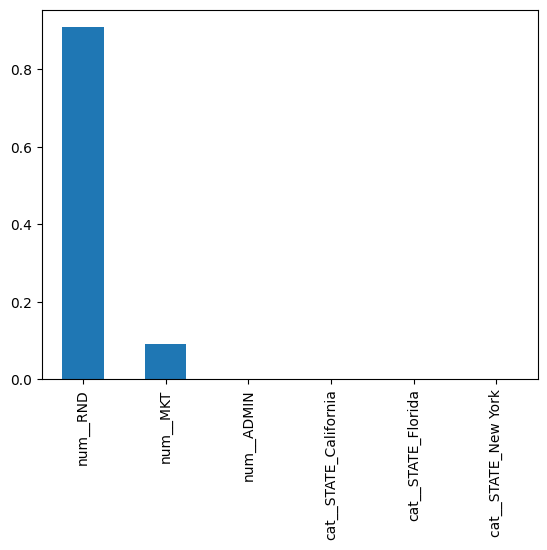

In [74]:
imp.sort_values(ascending=False).plot(kind='bar')

## Plot the tree

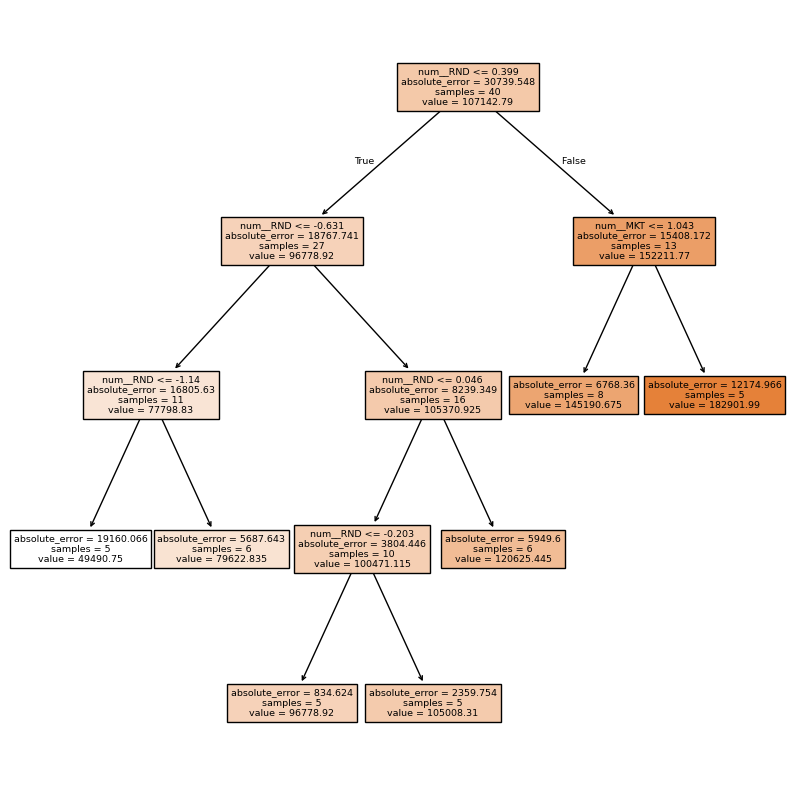

In [75]:
import matplotlib.pyplot as plt 
from sklearn.tree import plot_tree
plt.figure(figsize=(10, 10))
plot_tree(
    best_dtr,
    feature_names=xtrain.columns,
    filled=True
)
plt.show()

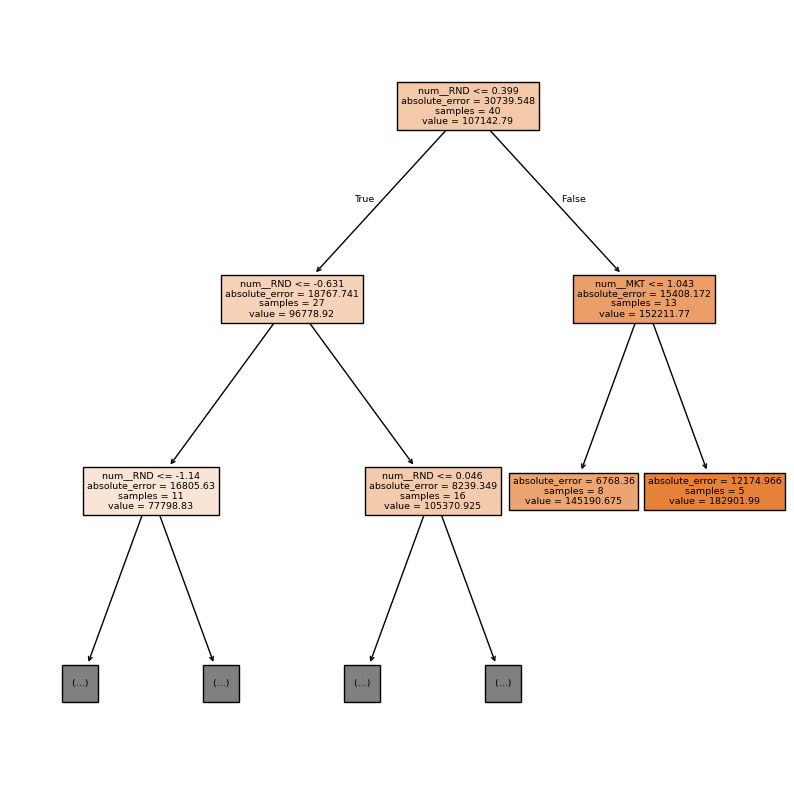

In [76]:
import matplotlib.pyplot as plt 
from sklearn.tree import plot_tree
plt.figure(figsize=(10, 10))
plot_tree(
    best_dtr,
    feature_names=xtrain.columns,
    filled=True,
    max_depth=2
)
plt.show()